# Read Data from the disk

In [4]:
# [Input Vars]
#   1. <string> PATH_TO_DESIRED_LOCATION: It should be the directory containing (1) images/ (2) train.txt (3) test.txt (4) val.txt

# [Output Vars]
#   1. <ndarray> np_train_txt: It contains both the directory to a specific image and the related label.
#   2. <ndarray> np_test_txt: It contains both the directory to a specific image and the related label.
#   3. <ndarray> np_val_txt: It contains both the directory to a specific image and the related label.
import pandas as pd
import numpy as np
def read_metadata_files(Root_Path):
    # train.txt
    train_txt = pd.read_csv(Root_Path+"train.txt", sep=" ")
    NP_TRAIN_TXT = np.array(train_txt)
    
    # test.txt
    test_txt = pd.read_csv(Root_Path+"test.txt", sep=" ")
    NP_TEST_TXT = np.array(test_txt)
    
    # val.txt
    val_txt = pd.read_csv(Root_Path+"val.txt", sep=" ")
    NP_VAL_TXT = np.array(val_txt)
    
    print(f"[Check] There are {NP_TRAIN_TXT.shape[0]} pairs in train.txt.")
    print(f"[Check] There are {NP_TEST_TXT.shape[0]} pairs in test.txt.")
    print(f"[Check] There are {NP_VAL_TXT.shape[0]} pairs in val.txt.\n")
    
    return NP_TRAIN_TXT, NP_TEST_TXT, NP_VAL_TXT, len(NP_TRAIN_TXT), len(NP_TEST_TXT), len(NP_VAL_TXT)

Root_Path = "C:/Users/USER/Desktop/Projects/Github_Repo/AI/DeepLearning/__HW1_DATA/"
AC_Dataset_Path="C:/Users/rathe/Desktop/Dataset/images/"
train_meta, test_meta, val_meta, len_train_meta, len_test_meta, len_val_meta = read_metadata_files(Root_Path)
print(f"The shape of test_meta is {test_meta.shape}")
print(f"The path of 1st example in test_meta is {test_meta[0][0]}")
print(f"The label of 1st example in test_meta is {test_meta[0][1]}")

[Check] There are 63324 pairs in train.txt.
[Check] There are 449 pairs in test.txt.
[Check] There are 449 pairs in val.txt.

The shape of test_meta is (449, 2)
The path of 1st example in test_meta is images/n02111277/n02111277_9422.JPEG
The label of 1st example in test_meta is 0


In [6]:
from tqdm import tqdm
import cv2 as cv
import numpy as np

def load_dataset(len_dataset, dataset, height, width):
    img_dataset = np.zeros((len_dataset, height, width, 3))
    img_label = np.zeros(len_dataset)

    for i in tqdm(range(len_dataset)):
        # 取 label
        img_label[i] = int(dataset[i][1])
        # 取 input
        img = cv.imread(Root_Path + dataset[i][0])
        img_resize = cv.resize(img, (height, width))
        # 把 img 放入 dataset
        img_dataset[i] = img_resize/255.
    return img_dataset, img_label

# read the dataset with load func

train_image_2, train_label_2 = load_dataset(len_train_meta, train_meta, 30, 30)
test_image_2, test_label_2 = load_dataset(len_test_meta, test_meta, 30, 30)
val_image_2, val_label_2 = load_dataset(len_val_meta, val_meta, 30, 30)

100%|███████████████████████████████████████████████████████████████████████████████| 449/449 [00:01<00:00, 315.07it/s]


In [7]:
from tqdm import tqdm
import numpy as np

train_label = np.zeros((len(train_label_2), 50))

for i in tqdm(range(len(train_label_2))):
    tmp = np.zeros(50)
    tmp[int(train_label_2[i])] = 1
    train_label[i] = tmp

test_label = np.zeros((len(test_label_2), 50))

for i in tqdm(range(len(test_label_2))):
    tmp = np.zeros(50)
    tmp[int(test_label_2[i])] = 1
    test_label[i] = tmp
    
val_label = np.zeros((len(val_label_2), 50))

for i in tqdm(range(len(val_label_2))):
    tmp = np.zeros(50)
    tmp[int(val_label_2[i])] = 1
    val_label[i] = tmp

100%|████████████████████████████████████████████████████████████████████████████| 449/449 [00:00<00:00, 149665.62it/s]


# Build tf.keras Version LeNet5 (Static)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 28, 28, 6)         168       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 1, 1, 120)         69240     
_________________________________________________________________
flatten_40 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 84)               

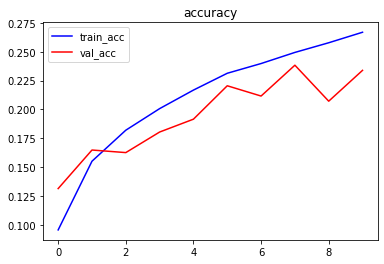

<Figure size 432x288 with 0 Axes>

In [129]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

# Lenet5 Version

num_classes = 50

model = tf.keras.Sequential([
    layers.Conv2D(6, 3, input_shape=(30, 30, 3) ,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(120, 6, activation="relu"),
    layers.Flatten(),
    layers.Dense(84, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])
history = model.fit(train_image_2, train_label, validation_data=(val_image_2,val_label), batch_size=50, epochs=10)

import matplotlib.pyplot as plt

def plot_accuracy(history, miny=None):
    acc = history.history['acc']
    test_acc = history.history['val_acc']
    epochs = range(len(acc))
    plt.plot(epochs, acc, c = "b", label='train_acc')
    plt.plot(epochs, test_acc, c = "r" ,label='val_acc')
    plt.legend(loc="upper left")

    plt.title('accuracy') 
    plt.figure()
    plt.show()
    
plot_accuracy(history)

In [130]:
preds = model.predict(test_image_2)
pred_ans = np.argmax(preds, axis=1)

counter = 0
for i in range(len(pred_ans)):
    if test_label_2[i] == pred_ans[i]:
        counter = counter + 1
        
print(round(counter/len(pred_ans)*100,2))

26.73


# Static vs Dynamic
# Static

In [136]:
import tensorflow as tf

class MyLeNet5_Static(tf.keras.Model):
    
    def __init__(self):
        # dynamic = True --> Dynamic; dynamic = False --> Static
        super(MyLeNet5_Static, self).__init__(name='MyLeNet5_Static', dynamic = False)
        self.conv_layer_1 = tf.keras.layers.Conv2D(filters = 6, kernel_size = (3, 3), input_shape=(30, 30, 3), padding="valid", activation='relu')
        self.pool_layer_1 = tf.keras.layers.MaxPool2D(2,2)
        self.conv_layer_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding="valid", activation='relu')        
        self.pool_layer_2 = tf.keras.layers.MaxPool2D(2,2)
        self.conv_layer_3 = tf.keras.layers.Conv2D(filters = 120, kernel_size = (6, 6), padding="valid", activation='relu')        
        self.fc_layer_1 = tf.keras.layers.Flatten()
        self.fc_layer_2 = tf.keras.layers.Dense(84, activation="relu")
        self.fc_layer_3 = tf.keras.layers.Dense(50, activation="softmax")
    
    def call(self, inputs):
        activation = self.conv_layer_1(inputs)
        activation = self.pool_layer_1(activation)
        activation = self.conv_layer_2(activation)
        activation = self.pool_layer_2(activation)
        activation = self.fc_layer_1(activation)
        activation = self.fc_layer_2(activation)
        output = self.fc_layer_3(activation)
        return output
    
from tensorflow.keras.optimizers import RMSprop
modelx = MyLeNet5_Static()
modelx.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=RMSprop(lr=0.001)) # Static
modelx.fit(train_image_2, train_label, validation_data=(val_image_2,val_label), batch_size=50, epochs=10)

Train on 63324 samples, validate on 449 samples
Epoch 1/10
63324/63324 [==============================] - 11s 179us/sample - loss: 3.5010 - val_loss: 3.2888
Epoch 2/10
63324/63324 [==============================] - 11s 168us/sample - loss: 3.1581 - val_loss: 3.1772
Epoch 3/10
63324/63324 [==============================] - 10s 164us/sample - loss: 3.0383 - val_loss: 3.0658
Epoch 4/10
63324/63324 [==============================] - 10s 161us/sample - loss: 2.9634 - val_loss: 2.9960
Epoch 5/10
63324/63324 [==============================] - 10s 161us/sample - loss: 2.9069 - val_loss: 2.9983
Epoch 6/10
63324/63324 [==============================] - 10s 164us/sample - loss: 2.8566 - val_loss: 2.9776
Epoch 7/10
63324/63324 [==============================] - 10s 161us/sample - loss: 2.8134 - val_loss: 2.9614
Epoch 8/10
63324/63324 [==============================] - 10s 162us/sample - loss: 2.7777 - val_loss: 2.8811
Epoch 9/10
63324/63324 [==============================] - 10s 164us/sample - los

# Dynamic

In [137]:
import tensorflow as tf

class MyLeNet5_Dynamic(tf.keras.Model):
    
    def __init__(self):
        # dynamic = True --> Dynamic; dynamic = False --> Static
        super(MyLeNet5_Dynamic, self).__init__(name='MyLeNet5_Dynamic', dynamic = True)
        self.conv_layer_1 = tf.keras.layers.Conv2D(filters = 6, kernel_size = (3, 3), input_shape=(30, 30, 3), padding="valid", activation='relu')
        self.pool_layer_1 = tf.keras.layers.MaxPool2D(2,2)
        self.conv_layer_2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding="valid", activation='relu')        
        self.pool_layer_2 = tf.keras.layers.MaxPool2D(2,2)
        self.conv_layer_3 = tf.keras.layers.Conv2D(filters = 120, kernel_size = (6, 6), padding="valid", activation='relu')        
        self.fc_layer_1 = tf.keras.layers.Flatten()
        self.fc_layer_2 = tf.keras.layers.Dense(84, activation="relu")
        self.fc_layer_3 = tf.keras.layers.Dense(50, activation="softmax")
    
    def call(self, inputs):
        activation = self.conv_layer_1(inputs)
        activation = self.pool_layer_1(activation)
        activation = self.conv_layer_2(activation)
        activation = self.pool_layer_2(activation)
        activation = self.fc_layer_1(activation)
        activation = self.fc_layer_2(activation)
        output = self.fc_layer_3(activation)
        return output
    
from tensorflow.keras.optimizers import RMSprop
modelx = MyLeNet5_Dynamic()
modelx.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=RMSprop(lr=0.001)) # Dynamic
modelx.fit(train_image_2, train_label, validation_data=(val_image_2,val_label), batch_size=50, epochs=10)

Train on 63324 samples, validate on 449 samples
Epoch 1/10
63324/63324 [==============================] - 38s 603us/sample - loss: 3.4845 - val_loss: 3.2686
Epoch 2/10
63324/63324 [==============================] - 38s 606us/sample - loss: 3.1758 - val_loss: 3.1378
Epoch 3/10
63324/63324 [==============================] - 39s 610us/sample - loss: 3.0586 - val_loss: 2.9771
Epoch 4/10
63324/63324 [==============================] - 38s 606us/sample - loss: 2.9787 - val_loss: 2.9761
Epoch 5/10
63324/63324 [==============================] - 40s 633us/sample - loss: 2.9153 - val_loss: 2.9366
Epoch 6/10
63324/63324 [==============================] - 39s 615us/sample - loss: 2.8646 - val_loss: 2.9992
Epoch 7/10
63324/63324 [==============================] - 39s 614us/sample - loss: 2.8195 - val_loss: 2.8905
Epoch 8/10
63324/63324 [==============================] - 38s 607us/sample - loss: 2.7792 - val_loss: 2.8108
Epoch 9/10
63324/63324 [==============================] - 39s 608us/sample - los